In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For predictive modeling
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance

In [2]:
# Project 1: General Exploratory Data Analysis (EDA)

In [3]:
# Generate a sample dataset with random values
data = {
    'Product': np.random.choice(['A', 'B', 'C', 'D', 'E'], 100),  # Random product categories
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 100),  # Random regions
    'Sales': np.random.randint(100, 1000, 100),  # Random sales values between 100 and 1000
    'Profit': np.random.randint(10, 300, 100),  # Random profit values between 10 and 300
    'Discount': np.random.uniform(0, 0.5, 100),  # Random discount values between 0% and 50%
    'Category': np.random.choice(['Electronics', 'Furniture', 'Clothing'], 100),  # Random product categories
    'Date': pd.date_range(start='1/1/2023', periods=100)  # 100 consecutive days
}
df = pd.DataFrame(data)

In [4]:
# Data Cleaning

In [5]:
# Removing duplicate records to maintain data integrity
df.drop_duplicates(inplace=True)

In [6]:

# Filling missing values with column mean (if any)
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [7]:
# Detect and handle outliers using Interquartile Range (IQR) method
Q1 = df[['Sales', 'Profit']].quantile(0.25)
Q3 = df[['Sales', 'Profit']].quantile(0.75)
IQR = Q3 - Q1

In [8]:
# Removing outliers that are 1.5 times IQR away from Q1 or Q3
df = df[~((df[['Sales', 'Profit']] < (Q1 - 1.5 * IQR)) | (df[['Sales', 'Profit']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# Exploratory Data Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


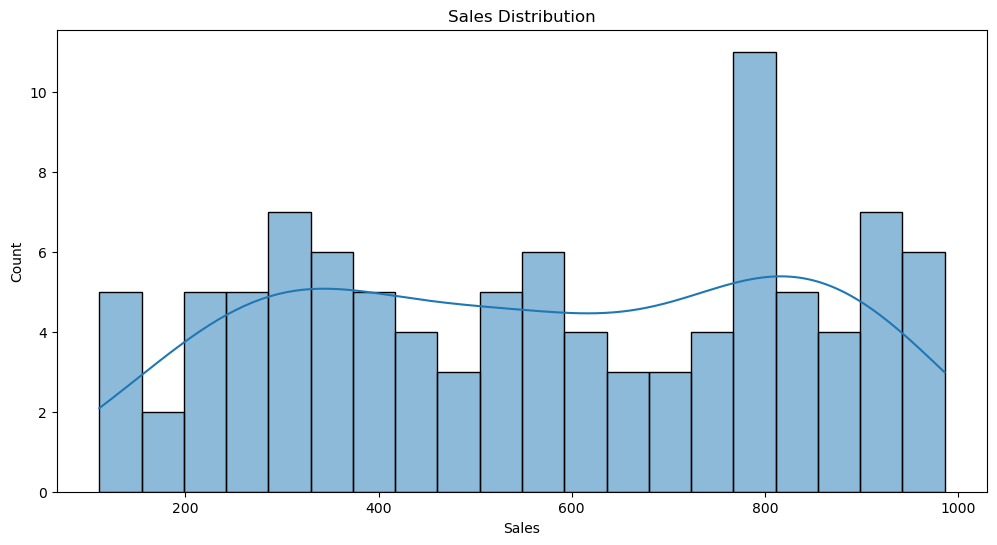

In [10]:
# Sales distribution histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.show()

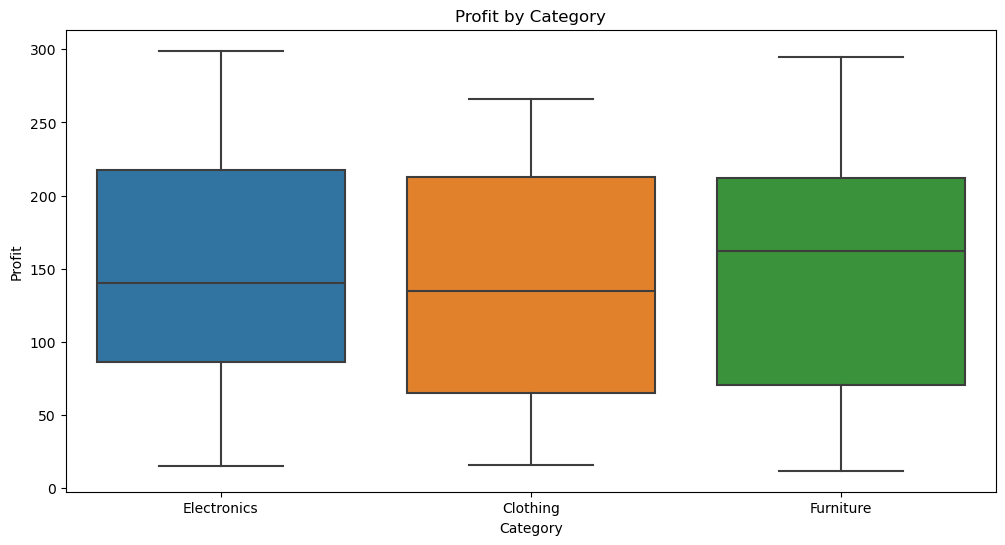

In [11]:
# Boxplot to analyze profit distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Category'], y=df['Profit'])
plt.title('Profit by Category')
plt.show()

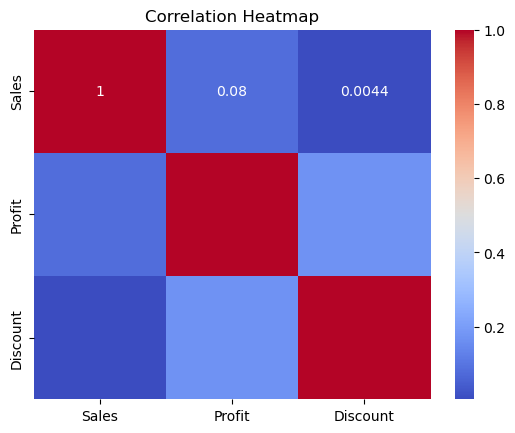

In [12]:
# Heatmap to visualize correlations between numerical variables
sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Project 2: Sales Performance Analysis

In [14]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

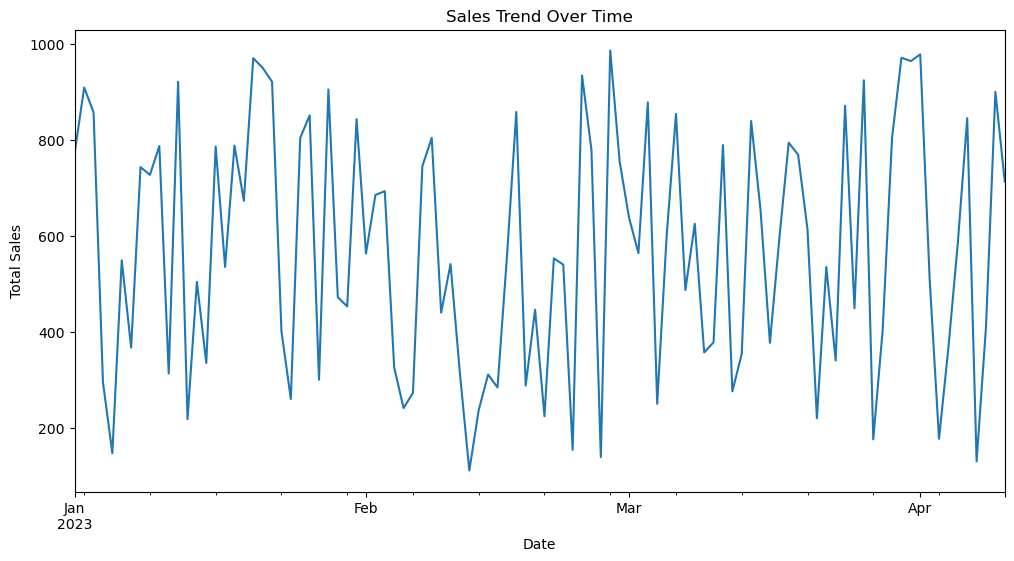

In [15]:
# Sales Trend Analysis (Time series plot of total sales over time)
plt.figure(figsize=(12, 6))
df.groupby('Date')['Sales'].sum().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

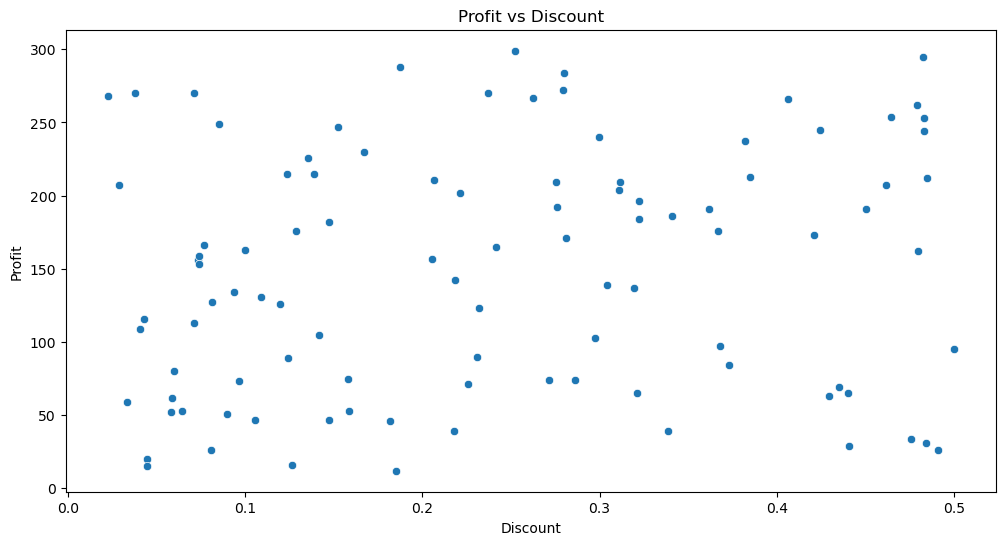

In [16]:
# Scatter plot to visualize the relationship between Profit and Discount
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Discount'], y=df['Profit'])
plt.title('Profit vs Discount')
plt.show()

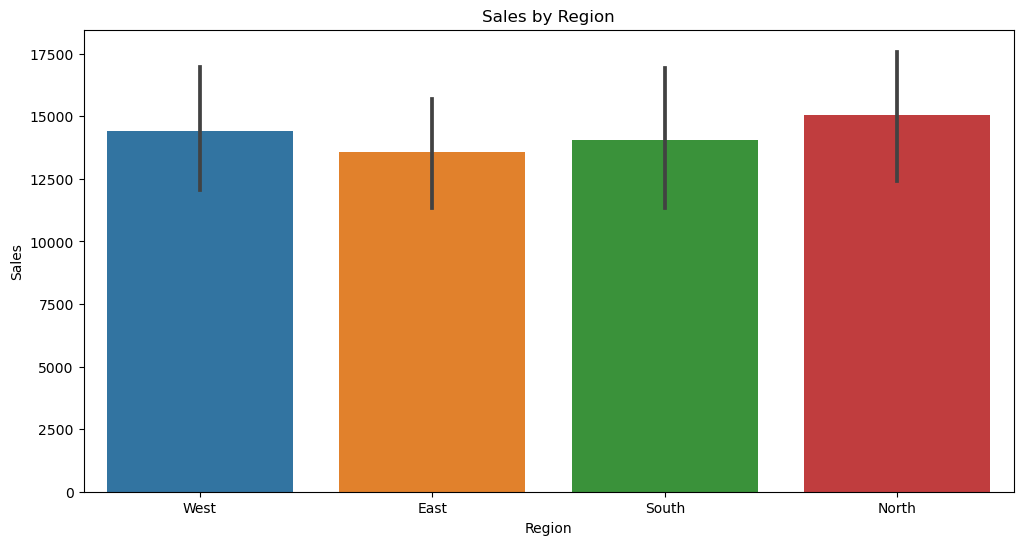

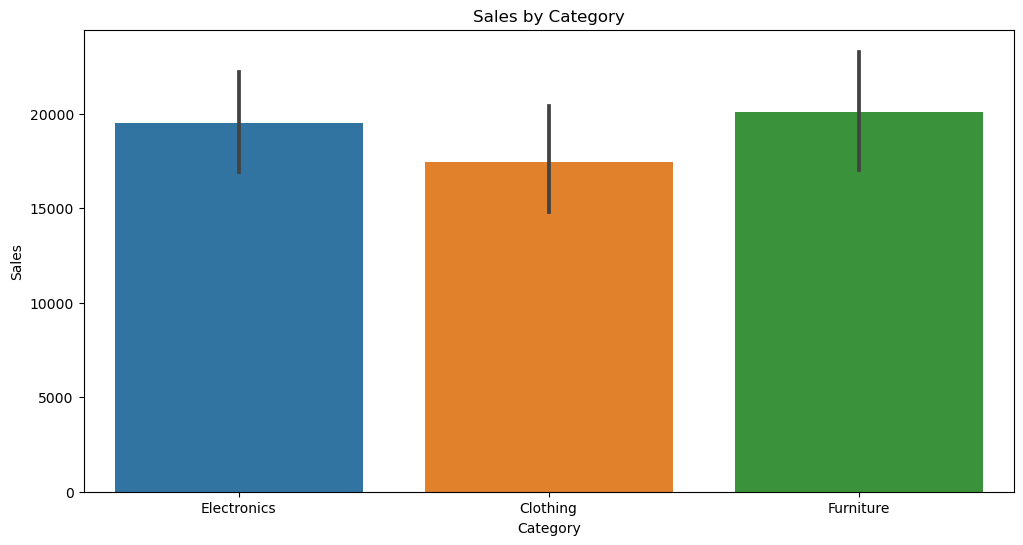

In [17]:
# Bar charts to analyze sales distribution by Region and Category
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Region'], y=df['Sales'], estimator=np.sum)
plt.title('Sales by Region')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=df['Category'], y=df['Sales'], estimator=np.sum)
plt.title('Sales by Category')
plt.show()

In [18]:
# Predictive Modeling: Predicting Sales using Profit and Discount
X = df[['Profit', 'Discount']]  # Independent variables
y = df['Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting data

In [19]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  # Predicting sales for test data

In [20]:
# Model Evaluation using R² Score and Mean Squared Error
print("R2 Score:", r2_score(y_test, y_pred))  # Measures how well the model explains variability in data
print("MSE:", mean_squared_error(y_test, y_pred))  # Measures average squared difference between predicted and actual values

R2 Score: -0.13277129507101848
MSE: 66824.95115398406
